In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.stats import linregress
from scipy import stats
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

#Path to CSV
final_df_csv = Path("final_df.csv")
final_df = pd.read_csv(final_df_csv)

In [2]:
#Create linear regression function
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = np.array(x_values) * slope + intercept
    plt.plot(x_values, regress_values, "r-")
    #Create equation for y=mx+b and display on plot at the end of regression line
    equation = f"y= {round(slope,3)}x + {round(intercept,3)}"
    annotation_x = max(x_values)
    annotation_y = regress_values[-1]
    plt.annotate(equation, (annotation_x, annotation_y), color="r", fontsize=15)
    #Display correlation coefficient on the plot
    r_text = f"r-value = {round(rvalue, 3)}"
    plt.text(min(x_values), min(y_values), r_text, color="r", fontsize=12)

In [3]:
#Create map with size based on stop count per zip and shows stops per capita and stops per sqmile
map_plot = final_df.hvplot.points("Longitude",
                                  "Latitude",
                                  geo=True,
                                  tiles = "OSM",
                                  frame_width = 800,
                                  frame_height=700,
                                  size="Stop Count",
                                  scale=1.0,
                                  color="Stop Count",
                                  hover_cols=["Stop Count","Stop per capita", 
                                              "Stops per Sq Mile", "Zipcode"]
)
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Stop Count,Stops per Sq Mile,Zipcode)

In [4]:
#Create map with size based on college readiness and shows free/reduced lunch %
map_plot = final_df.hvplot.points("Longitude",
                                  "Latitude",
                                  geo=True,
                                  tiles = "OSM",
                                  frame_width = 800,
                                  frame_height=700,
                                  size="College Readiness (%)",
                                  scale=20.0,
                                  color="Free/Reduced Lunch (%)",
                                  hover_cols=["Free/Reduced Lunch (%)","Zipcode"]
)
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Free/Reduced Lunch (%),College Readiness (%),Zipcode)

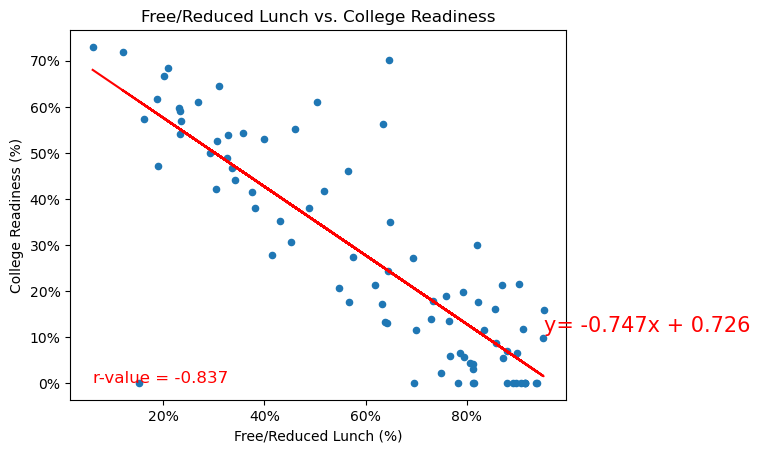

In [5]:
#Free/Reduced Lunch vs. College Readiness Scatter
freereduced_grad = final_df.plot(kind="scatter", x="Free/Reduced Lunch (%)", y="College Readiness (%)", grid=False,
              xlabel="Free/Reduced Lunch (%)",
              ylabel="College Readiness (%)",
              title="Free/Reduced Lunch vs. College Readiness")
freereduced_grad.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
freereduced_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

x_values = final_df["Free/Reduced Lunch (%)"]
y_values = final_df["College Readiness (%)"]
linear_regression(x_values, y_values)
plt.show()

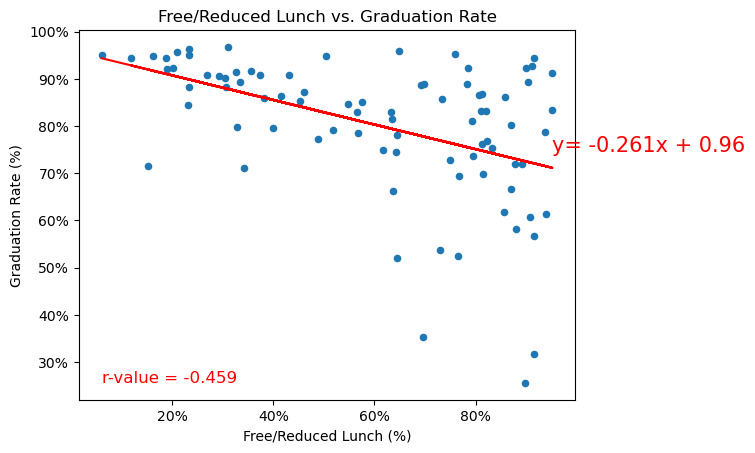

In [6]:
#Free/Reduced Lunch vs. Grad Rate (%)
freereduced_grad = final_df.plot(kind="scatter", x="Free/Reduced Lunch (%)", y="Grad Rate (%)", grid=False,
              xlabel="Free/Reduced Lunch (%)",
              ylabel="Graduation Rate (%)",
              title="Free/Reduced Lunch vs. Graduation Rate")
freereduced_grad.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
freereduced_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

x_values = final_df["Free/Reduced Lunch (%)"]
y_values = final_df["Grad Rate (%)"]
linear_regression(x_values, y_values)
plt.show()

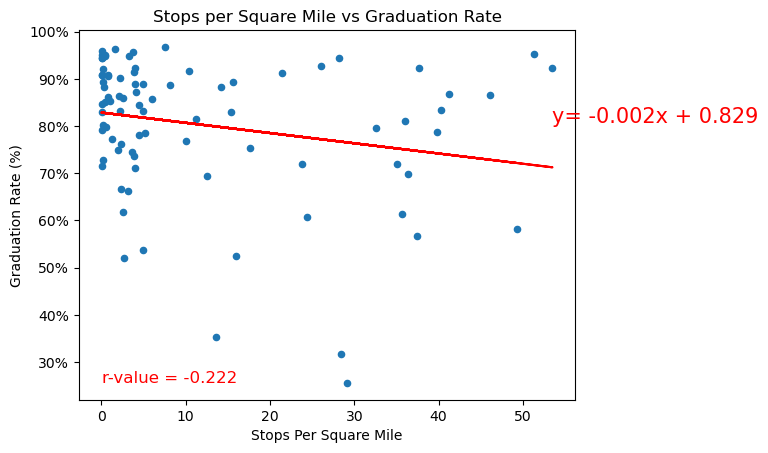

In [7]:
#Stops Per Square Mile vs Graduation Rate (%)
transport_grad = final_df.plot(kind="scatter",x="Stops per Sq Mile",y="Grad Rate (%)",grid=False,
                              xlabel="Stops Per Square Mile",
                              ylabel="Graduation Rate (%)",
                              title="Stops per Square Mile vs Graduation Rate")
transport_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0,decimals=0))

x_values = final_df["Stops per Sq Mile"]
y_values = final_df["Grad Rate (%)"]
linear_regression(x_values, y_values)
plt.show()

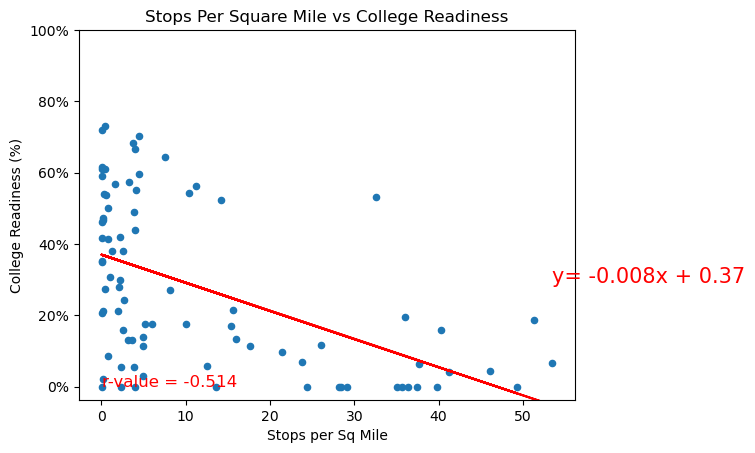

In [8]:
#Stops Per Square Mile vs College Readiness (%)
transport_readiness = final_df.plot(kind="scatter",x="Stops per Sq Mile",y="College Readiness (%)",grid=False,
                                   xlabel="Stops per Sq Mile",
                                   ylabel="College Readiness (%)",
                                   title="Stops Per Square Mile vs College Readiness")
transport_readiness.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0,decimals=0))
transport_readiness.set_ylim(top=1)

x_values = final_df["Stops per Sq Mile"]
y_values = final_df["College Readiness (%)"]
linear_regression(x_values, y_values)
plt.show()

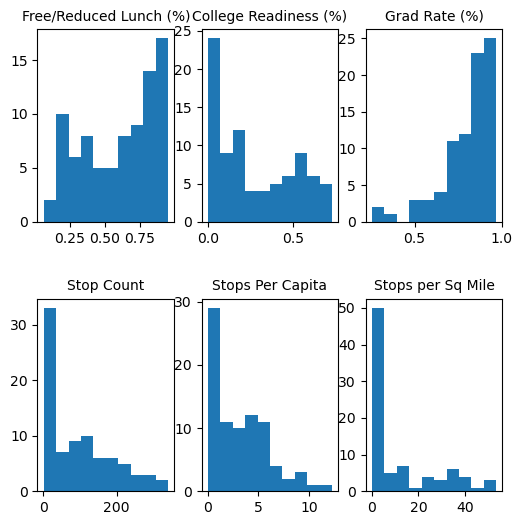

In [9]:
# Plots/subplots histograms, showing frequency/distribution of various factors including, free/reduced, college readiness, stop count, stop per capita, and stop per sqmile
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=False)

# Plot boxplots and set titles
columns = ['Free/Reduced Lunch (%)', 'College Readiness (%)', 'Grad Rate (%)', 'Stop Count', 'Stops Per Capita', 'Stops per Sq Mile']
for i, col in enumerate(columns):
    row = i // 3
    col_num = i % 3
    axs[row, col_num].hist(final_df[col])
    axs[row, col_num].set_title(col, fontsize =10)

# Adjust subplot spacing
fig.subplots_adjust(hspace=0.4)

plt.show()